Устанавливаем giza для дальнейшего использования

In [1]:
!git clone https://github.com/sillsdev/giza-py.git
%cd giza-py
!pip install -r requirements.txt

Cloning into 'giza-py'...
remote: Enumerating objects: 69, done.
remote: Counting objects: 100% (69/69), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 69 (delta 40), reused 45 (delta 18), pack-reused 0
Unpacking objects: 100% (69/69), 23.15 KiB | 677.00 KiB/s, done.
/content/giza-py
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.1/238.1 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 45.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.0/764.0 kB 11.7 MB/s eta 0:00:00
  Attempting uninstall: regex
    Found existing installation: regex 2022.10.31
    Uninstalling regex-2022.10.31:
      Successfully uninstalled regex-2022.10.31
  Attempting uninstall: networkx
    Found existing installation: networkx 3.1
    Uninstalling networkx-3.1:
      Successfully uninstalled networkx-3.1
  Attempting uninstall: charset-norm

запускаем cmake

In [2]:
!git clone https://github.com/moses-smt/mgiza.git
%cd mgiza/mgizapp
!cmake -DBOOST_ROOT=/usr/include/boost -DBoost_USE_STATIC_LIBS=ON -DCMAKE_INSTALL_PREFIX=/content/giza-py/.bin .
!make
!make install

Cloning into 'mgiza'...
remote: Enumerating objects: 1053, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 1053 (delta 0), reused 3 (delta 0), pack-reused 1042
Receiving objects: 100% (1053/1053), 1.30 MiB | 20.18 MiB/s, done.
Resolving deltas: 100% (644/644), done.
/content/giza-py/mgiza/mgizapp
-- The C compiler identification is GNU 9.4.0
-- The CXX compiler identification is GNU 9.4.0
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
CMake Deprecation Warning at CMakeLists.txt:12 (CMAKE_MINIMUM_REQUIRED):
  Compatibility with CMake < 2.8.12 will be removed from a 

In [3]:
!pip --quiet install transformers sentencepiece conllu
!wget https://raw.githubusercontent.com/UniversalDependencies/UD_French-GSD/master/fr_gsd-ud-test.conllu -O french_gender.conllu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 81.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 64.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 94.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sil-machine 0.9.3 requires charset-normalizer<3.0.0,>=2.1.1, but you have charset-normalizer 2.0.12 which is incompatible.
--2023-05-20 08:23:34--  https://raw.githubusercontent.com/UniversalDependencies/UD_French-GSD/master/fr_gsd-ud-test.conllu
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting respons

Для начала проверим работу программы на выравнивании двух идентичных английских текстов. Устанавливаем nltk и токенизиуем файл.

In [4]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
%cd /content

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


/content


In [5]:
sentenses_en1 = []
with open("AF-BOOKS-2011-Meyer-7dae-EN-Chapter1.txt", "r") as file:
    for line in file.readlines():
        for sent in sent_tokenize(line):
            sentenses_en1.append(str(" ".join(word_tokenize(sent))))  

with open("eng_test1.txt", "w") as file1:
    file1.write("\n".join(sentenses_en1))

with open("eng_test2.txt", "w") as file1:
    file1.write("\n".join(sentenses_en1))

Даем программе файлы eng_test1.txt и eng_test2.txt для выравнивания

In [6]:
%cd /content/giza-py

!python3 giza.py --source /content/eng_test1.txt --target /content/eng_test2.txt --alignments ../eng2eng1.txt

/content/giza-py
Training...

***** 10 runs. (algorithm:TA)*****
;KategProblem:cats: 100   words: 788

start-costs: MEAN: 16489 (16378.2-16642.2)  SIGMA:73.639   
  end-costs: MEAN: 13255 (13245.9-13269)  SIGMA:8.12371   
   start-pp: MEAN: 51.9825 (49.7822-55.1316)  SIGMA:1.49207   
     end-pp: MEAN: 14.8857 (14.8337-14.9668)  SIGMA:0.0467785   
 iterations: MEAN: 18974.7 (18618-19637)  SIGMA:319.454   
       time: MEAN: 0.48139 (0.382056-0.720736)  SIGMA:0.141392   

***** 10 runs. (algorithm:TA)*****
;KategProblem:cats: 100   words: 788

start-costs: MEAN: 16489 (16378.2-16642.2)  SIGMA:73.639   
  end-costs: MEAN: 13255 (13245.9-13269)  SIGMA:8.12371   
   start-pp: MEAN: 51.9825 (49.7822-55.1316)  SIGMA:1.49207   
     end-pp: MEAN: 14.8857 (14.8337-14.9668)  SIGMA:0.0467785   
 iterations: MEAN: 18974.7 (18618-19637)  SIGMA:319.454   
       time: MEAN: 0.386637 (0.372702-0.405948)  SIGMA:0.0101501   
/tmp/tmp0r319jmi/src -> src
/tmp/tmp0r319jmi/trg -> trg
Starting MGIZA 
Initi

Визуализируем выравнивания для предложения **The white Chana panel van stopped under the trees in Second Avenue , between the Livingstone High School and the back yard of the South African Police Service ’ s Claremont Station .**

33


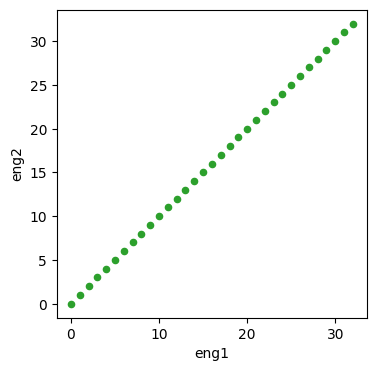

In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
with open("eng2eng1.txt", "r", encoding="utf-8") as file1:
    for line in file1.readlines()[42:43]:
        engl1 = []
        engl = []
        for pair in line.split():
            hyphen = pair.index('-')
            num1 = int(pair[:hyphen])
            num2 = pair[:hyphen:-1]
            num2 = int(num2[::-1])

            engl1.append(num1)
            engl.append(num2)

        print(len(engl1))
        #print(engl)

        fig, ax = plt.subplots(figsize=(4, 4))
        ax.scatter(engl1, engl, s=20, facecolor='C2')
        ax.set_xlabel('eng1')
        ax.set_ylabel('eng2')


Теперь токенизируем тексты на африкаанс и английском и дадим их программе

In [10]:
sentenses_afr1 = []
with open("AF-BOOKS-2011-Meyer-7dae-Chapter1.txt", "r") as file:
    for line in file.readlines():
        for sent in sent_tokenize(line):
            sentenses_afr1.append(str(" ".join(word_tokenize(sent))))  
            
print(sentenses_afr1)

#with open("tokens_en1.txt", "w") as file1:
#    file1.write(" ".join(tokens_en1))

sentenses_afr2 = []
with open("AF-BOOKS-2011-Meyer-7dae-Chapter2.txt", "r") as file:
    for line in file.readlines():
        for sent in sent_tokenize(line):
            sentenses_afr2.append(str(" ".join(word_tokenize(sent))))  
            
print(sentenses_afr2)

with open("tokens_afr.txt", "w") as file1:
    file1.write("\n".join(sentenses_afr1[2:]))
    file1.write("\n".join(sentenses_afr2))

['Dag 1', 'Saterdag', '1', "Hy wil net nie 'n gat van homself maak nie .", "Speurder-kaptein Bennie Griessel is in 'n nuwe stel klere wat hy nie kan bekostig nie , met 'n bos blomme op die passasiersitplek , sy hande swetend op die stuurwiel , sy hele wese hunkerend na die helende , senu-kalmerende kragte van drank .", "Want vanaand wil hy asseblief tog nie 'n gat van homself maak nie .", 'Nie voor Alexa Barnard nie , nie voor musieksterre nie , nie ná al die voorbereidings van die afgelope week nie .', 'Maandag al het hy sy hare laat sny .', 'Dinsdag was Mat Joubert se vrou , Margaret , sy klere-konsultant by Romens in Tygervallei .', "`` Dis smart casual , Bennie , net chino 's en 'n mooi hemp , '' het sy geduldig in haar sjarmante Engelse aksent gesê .", "`` Nee , 'n baadjie ook , '' het Griessel vasgeskop , baie bang vir te `` casual '' , en nie `` smart '' genoeg nie .", 'Want daar gaan smart mense wees .', "Hy wou 'n das ook hê , maar Margaret het haar voet neergesit .", '`` O

In [11]:
sentenses_en1 = []
with open("AF-BOOKS-2011-Meyer-7dae-EN-Chapter1.txt", "r") as file:
    for line in file.readlines():
        for sent in sent_tokenize(line):
            sentenses_en1.append(str(" ".join(word_tokenize(sent))))  

print(sentenses_en1)

#with open("tokens_en1.txt", "w") as file1:
#    file1.write(" ".join(tokens_en1))

sentenses_en2 = []
with open("AF-BOOKS-2011-Meyer-7dae-EN-Chapter2.txt", "r") as file:
    for line in file.readlines():
        for sent in sent_tokenize(line):
            sentenses_en2.append(str(" ".join(word_tokenize(sent))))  

print(sentenses_en2)

with open("tokens_en.txt", "w") as file1:
    file1.write("\n".join(sentenses_en1))
    file1.write("\n".join(sentenses_en2))

['1', 'Whatever happened , he just didn ’ t want to make a complete idiot of himself .', 'Detective Captain Benny Griessel was wearing a new suit of clothes that he could ill afford .', 'There was a bouquet of flowers on the passenger seat , his hands gripping the steering wheel were clammy , and with all his being he yearned for the healing , calming powers of alcohol .', 'Tonight he must just please not make a total idiot of himself .', 'Not in front of Alexa Barnard , not in front of all the stars of the music world , not after all the past week ’ s planning and preparation .', 'He ’ d started on Monday , with a haircut .', 'Tuesday , Mat Joubert ’ s wife , Margaret , had been his style consultant at Romens in Tyger Valley .', '‘ It ’ s smart casual , Benny , just a pair of chinos and a smart shirt , ’ she had “ said patiently in her charming English accent .', '‘ No , I want a jacket too. ’ Griessel had dug in his heels , terrified of being caught between too ‘ casual ’ and not ‘ s

Применяем giza к токенизированным текстам и сохраняем в файл af2eng1.txt

In [12]:
%cd /content/giza-py

/content/giza-py


In [14]:
!python3 giza.py --source /content/giza-py/tokens_afr.txt --target /content/giza-py/tokens_en.txt --alignments ../af2eng1.txt --m4 10

Training...

***** 10 runs. (algorithm:TA)*****
;KategProblem:cats: 100   words: 1113

start-costs: MEAN: 30174.7 (29954.8-30403.3)  SIGMA:150.645   
  end-costs: MEAN: 25190.4 (25165.1-25208.7)  SIGMA:14.7407   
   start-pp: MEAN: 77.3186 (73.3209-81.5985)  SIGMA:2.77896   
     end-pp: MEAN: 23.537 (23.3953-23.64)  SIGMA:0.0826976   
 iterations: MEAN: 26569.8 (25989-28286)  SIGMA:632.176   
       time: MEAN: 0.694938 (0.592687-1.05018)  SIGMA:0.178296   

***** 10 runs. (algorithm:TA)*****
;KategProblem:cats: 100   words: 1254

start-costs: MEAN: 33896.9 (33767.6-34152.1)  SIGMA:135.963   
  end-costs: MEAN: 28025.7 (28001.6-28050.3)  SIGMA:15.3558   
   start-pp: MEAN: 84.8788 (82.5262-89.6049)  SIGMA:2.50363   
     end-pp: MEAN: 24.146 (24.0217-24.2736)  SIGMA:0.0793745   
 iterations: MEAN: 29709.7 (29203-30622)  SIGMA:397.067   
       time: MEAN: 0.774361 (0.624899-1.32059)  SIGMA:0.260186   
/tmp/tmpk1436h7h/src -> src
/tmp/tmpk1436h7h/trg -> trg
Starting MGIZA 
Initializing

Создаем два списка: с индексами слов на африкаанс и с индексами слов на английском.

предложения для которых выводим соответствия:

1 - 

`` The knee is bad , '' sê Nyathi .


‘ The knee is bad , ’ said Nyathi .

2 - 

`` Disintegrated . ''

‘ Shattered . ’




[0, 1, 1, 1, 1, 2, 3, 4, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 4, 4, 4, 8, 8, 8, 9]
12
12
[0, 1, 2, 3]
[0, 1, 2, 1]
4
4


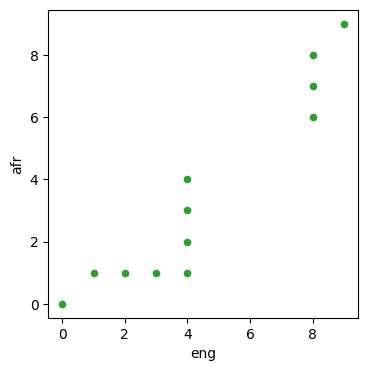

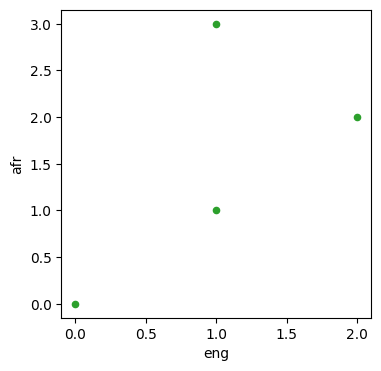

In [16]:
with open("af2eng1.txt", "r", encoding="utf-8") as file1:
    for line in file1.readlines()[243:245]:
        afric = []
        engl = []
        for pair in line.split():
            hyphen = pair.index('-')
            num1 = int(pair[:hyphen])
            num2 = pair[:hyphen:-1]
            num2 = int(num2[::-1])

            afric.append(num1)
            engl.append(num2)

        print(afric)
        print(engl)
        print(len(afric))
        print(len(engl))

        fig, ax = plt.subplots(figsize=(4, 4))
        ax.scatter(engl, afric, s=20, facecolor='C2')
        ax.set_xlabel('eng')
        ax.set_ylabel('afr')
        

100 итераций

In [18]:
!python3 giza.py --source /content/giza-py/tokens_afr.txt --target /content/giza-py/tokens_en.txt --alignments ../af2eng100.txt --m4 100

Training...

***** 10 runs. (algorithm:TA)*****
;KategProblem:cats: 100   words: 1113

start-costs: MEAN: 30174.7 (29954.8-30403.3)  SIGMA:150.645   
  end-costs: MEAN: 25190.4 (25165.1-25208.7)  SIGMA:14.7407   
   start-pp: MEAN: 77.3186 (73.3209-81.5985)  SIGMA:2.77896   
     end-pp: MEAN: 23.537 (23.3953-23.64)  SIGMA:0.0826976   
 iterations: MEAN: 26569.8 (25989-28286)  SIGMA:632.176   
       time: MEAN: 0.604665 (0.591017-0.635617)  SIGMA:0.011575   

***** 10 runs. (algorithm:TA)*****
;KategProblem:cats: 100   words: 1254

start-costs: MEAN: 33896.9 (33767.6-34152.1)  SIGMA:135.963   
  end-costs: MEAN: 28025.7 (28001.6-28050.3)  SIGMA:15.3558   
   start-pp: MEAN: 84.8788 (82.5262-89.6049)  SIGMA:2.50363   
     end-pp: MEAN: 24.146 (24.0217-24.2736)  SIGMA:0.0793745   
 iterations: MEAN: 29709.7 (29203-30622)  SIGMA:397.067   
       time: MEAN: 0.895965 (0.629094-1.28528)  SIGMA:0.25277   
/tmp/tmp_mmyctb9/src -> src
/tmp/tmp_mmyctb9/trg -> trg
Starting MGIZA 
Initializing

[0, 1, 1, 1, 1, 2, 3, 4, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 4, 4, 4, 8, 8, 8, 9]
12
12
[0, 1, 2, 3]
[0, 1, 2, 3]
4
4


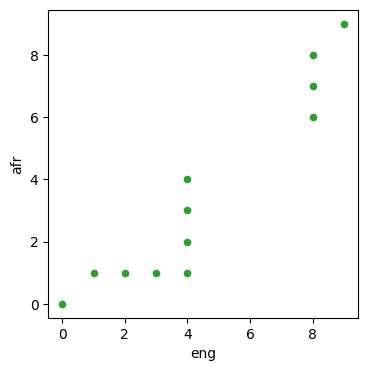

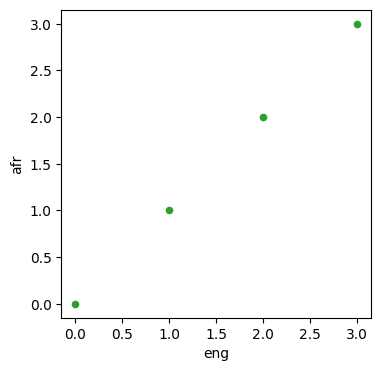

In [20]:
with open("af2eng100.txt", "r", encoding="utf-8") as file1:
    for line in file1.readlines()[243:245]:
        afric = []
        engl = []
        for pair in line.split():
            hyphen = pair.index('-')
            num1 = int(pair[:hyphen])
            num2 = pair[:hyphen:-1]
            num2 = int(num2[::-1])

            afric.append(num1)
            engl.append(num2)

        print(afric)
        print(engl)
        print(len(afric))
        print(len(engl))

        fig, ax = plt.subplots(figsize=(4, 4))
        ax.scatter(engl, afric, s=20, facecolor='C2')
        ax.set_xlabel('eng')
        ax.set_ylabel('afr')
        

1000 итераций

In [22]:
!python3 giza.py --source /content/giza-py/tokens_afr.txt --target /content/giza-py/tokens_en.txt --alignments ../af2eng1000.txt --m4 1000

Выходные данные были обрезаны до нескольких последних строк (5000).
#centers(pre/hillclimbed/real): 1 1 1  #al: 386.941 #alsophisticatedcountcollection: 11.0074 #hcsteps: 1.88235
#peggingImprovements: 0
D4 table contains 557438 parameters.
Thread 1done
A/D table contains 36530 parameters.
A/D table contains 29918 parameters.
NTable contains 12550 parameter.
p0_count is 2735.05 and p1 is 555.475; p0 is 0.83119 p1: 0.16881
Model4: TRAIN CROSS-ENTROPY 3.93075 PERPLEXITY 15.2502
Model4: (713) TRAIN VITERBI CROSS-ENTROPY 3.96566 PERPLEXITY 15.6237

Model4 Viterbi Iteration : 713 took: 0 seconds

---------------------
Model4: Iteration 714
#centers(pre/hillclimbed/real): 1 1 1  #al: 435.519 #alsophisticatedcountcollection: 11.3664 #hcsteps: 2.03817
#peggingImprovements: 0
#centers(pre/hillclimbed/real): 1 1 1  #al: 415.198 #alsophisticatedcountcollection: 11.4122 #hcsteps: 1.9313
#peggingImprovements: 0
D4 table contains 557438 parameters.
Thread 1done
A/D table contains 36530 parameters.
A/

[0, 1, 1, 1, 1, 2, 3, 4, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 4, 4, 4, 8, 8, 8, 9]
12
12
[0, 1, 2, 3]
[0, 1, 2, 3]
4
4


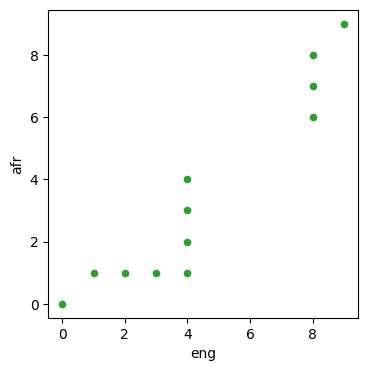

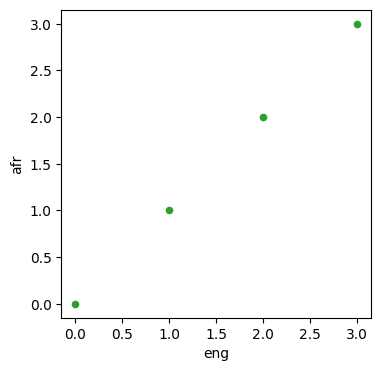

In [23]:
with open("af2eng1000.txt", "r", encoding="utf-8") as file1:
    for line in file1.readlines()[243:245]:
        afric = []
        engl = []
        for pair in line.split():
            hyphen = pair.index('-')
            num1 = int(pair[:hyphen])
            num2 = pair[:hyphen:-1]
            num2 = int(num2[::-1])

            afric.append(num1)
            engl.append(num2)

        print(afric)
        print(engl)
        print(len(afric))
        print(len(engl))

        fig, ax = plt.subplots(figsize=(4, 4))
        ax.scatter(engl, afric, s=20, facecolor='C2')
        ax.set_xlabel('eng')
        ax.set_ylabel('afr')
        

-----------